# **ANALISIS KORELASI PERTUMBUHAN PENDUDUK TERHADAP PERUBAHAN LUAS LAHAN SAWAH DI KABUPATEN PRINGSEWU TAHUN 2020-2023**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Membaca file pertama
penduduk = pd.read_csv('/content/drive/MyDrive/DATA/jumlah_penduduk.csv')

# Membaca file kedua
lahan = pd.read_csv('/content/drive/MyDrive/DATA/luas_lahan.csv')

In [ ]:
print(penduduk)

             Kecamatan    2020    2021    2022    2023
0            Pardasuka   35174   35292   37410   38027
1             Ambarawa   36387   36509   39053   39612
2            Pagelaran   52042   52216   55207   55930
3      Pagelaran Utara   15301   15352   16311   16530
4            Pringsewu   81776   82050   85897   87331
5           Gadingrejo   77727   77987   82639   83907
6            Sukoharjo   49704   49870   52845   53287
7             Banyumas   21292   21363   22852   23300
8             Adiluwih   36063   36184   38098   38758
9  Kabupaten Pringsewu  405466  406823  437222  437222


In [ ]:
from google.colab import data_table
data_table.DataTable(penduduk)

,Kecamatan,2020,2021,2022,2023
0,Pardasuka,35174,35292,37410,38027
1,Ambarawa,36387,36509,39053,39612
2,Pagelaran,52042,52216,55207,55930
3,Pagelaran Utara,15301,15352,16311,16530
4,Pringsewu,81776,82050,85897,87331
5,Gadingrejo,77727,77987,82639,83907
6,Sukoharjo,49704,49870,52845,53287
7,Banyumas,21292,21363,22852,23300
8,Adiluwih,36063,36184,38098,38758
9,Kabupaten Pringsewu,405466,406823,437222,437222


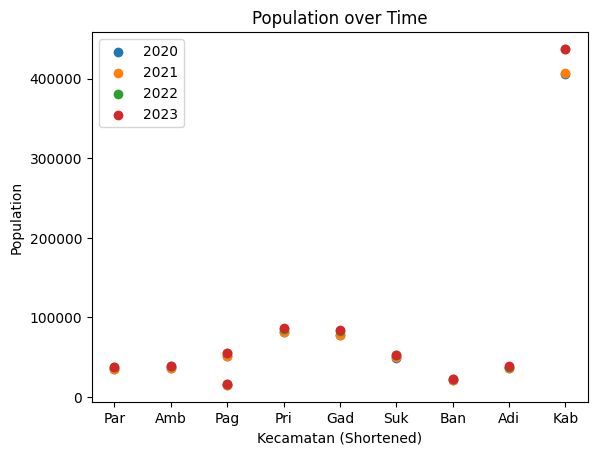

In [ ]:
#buat plot
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'Kecamatan' is a column in your DataFrame
# Extract first 3 characters of each 'Kecamatan'
kecamatan_shortened = penduduk['Kecamatan'].str[:3]

plt.scatter(kecamatan_shortened, penduduk['2020'])
plt.scatter(kecamatan_shortened, penduduk['2021'])
plt.scatter(kecamatan_shortened, penduduk['2022'])
plt.scatter(kecamatan_shortened, penduduk['2023'])

plt.xlabel('Kecamatan (Shortened)')
plt.ylabel('Population')
plt.title('Population over Time')
plt.legend(['2020', '2021', '2022', '2023'])
plt.show()

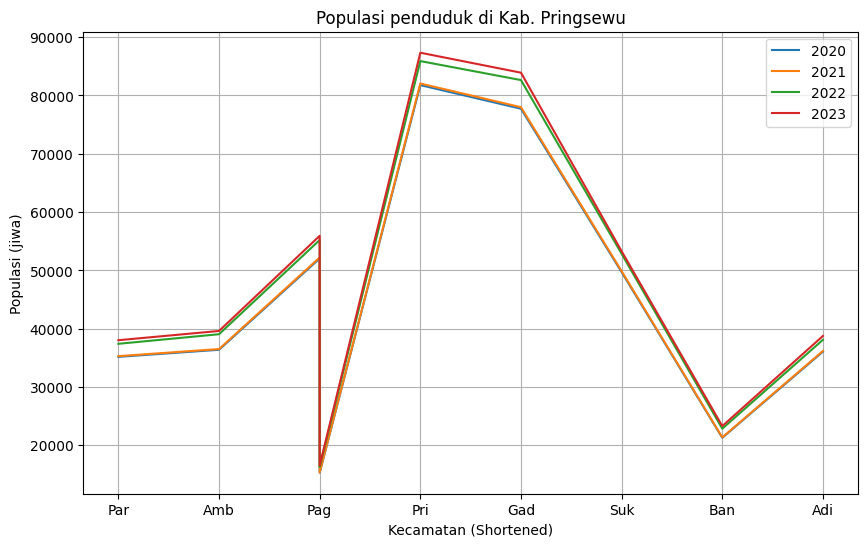

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'Kecamatan' is a column in your DataFrame
kecamatan_shortened = penduduk['Kecamatan'].str[:3]

# Exclude Kab Pringsewu
pringsewu_mask = ~penduduk['Kecamatan'].str.startswith('Kab')

# Plot lines for each year, excluding Pringsewu
plt.figure(figsize=(10, 6))
plt.plot(kecamatan_shortened[pringsewu_mask], penduduk['2020'][pringsewu_mask], label='2020')
plt.plot(kecamatan_shortened[pringsewu_mask], penduduk['2021'][pringsewu_mask], label='2021')
plt.plot(kecamatan_shortened[pringsewu_mask], penduduk['2022'][pringsewu_mask], label='2022')
plt.plot(kecamatan_shortened[pringsewu_mask], penduduk['2023'][pringsewu_mask], label='2023')

plt.xlabel('Kecamatan (Shortened)')
plt.ylabel('Populasi (jiwa)')
plt.title('Populasi penduduk di Kab. Pringsewu')
plt.legend()
plt.grid(True)
plt.show()

Secara umum mayoritas kecamatan yang ada di kab pringseuw mengalami PENINGKATAN populasi penduduk selama periode 2020-2023.

In [ ]:
print(lahan)

             Kecamatan   2020   2021   2022   2023
0            Pardasuka   2185   2185   2185   2164
1             Ambarawa   1877   1877   1877   2057
2            Pagelaran   1836   1836   1836   1656
3      Pagelaran Utara    445    445    445    504
4            Pringsewu   1463   1463   1463   1669
5           Gadingrejo   3637   3637   3637   3203
6            Sukoharjo   1068   1068   1068   1222
7             Banyumas    661    661    661    681
8             Adiluwih    756    756    756    790
9  Kabupaten Pringsewu  13928  13928  13928  13928


In [ ]:
from google.colab import data_table
data_table.DataTable(lahan)

,Kecamatan,2020,2021,2022,2023
0,Pardasuka,2185,2185,2185,2164
1,Ambarawa,1877,1877,1877,2057
2,Pagelaran,1836,1836,1836,1656
3,Pagelaran Utara,445,445,445,504
4,Pringsewu,1463,1463,1463,1669
5,Gadingrejo,3637,3637,3637,3203
6,Sukoharjo,1068,1068,1068,1222
7,Banyumas,661,661,661,681
8,Adiluwih,756,756,756,790
9,Kabupaten Pringsewu,13928,13928,13928,13928


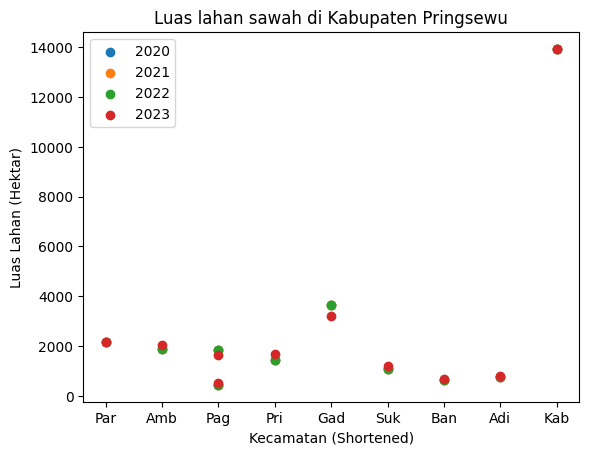

In [ ]:
#buat plot
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'Kecamatan' is a column in your DataFrame
# Extract first 3 characters of each 'Kecamatan'
kecamatan_shortened = lahan['Kecamatan'].str[:3]

plt.scatter(kecamatan_shortened, lahan['2020'])
plt.scatter(kecamatan_shortened, lahan['2021'])
plt.scatter(kecamatan_shortened, lahan['2022'])
plt.scatter(kecamatan_shortened, lahan['2023'])

plt.xlabel('Kecamatan (Shortened)')
plt.ylabel('Luas Lahan (Hektar)')
plt.title('Luas lahan sawah di Kabupaten Pringsewu')
plt.legend(['2020', '2021', '2022', '2023'])
plt.show()

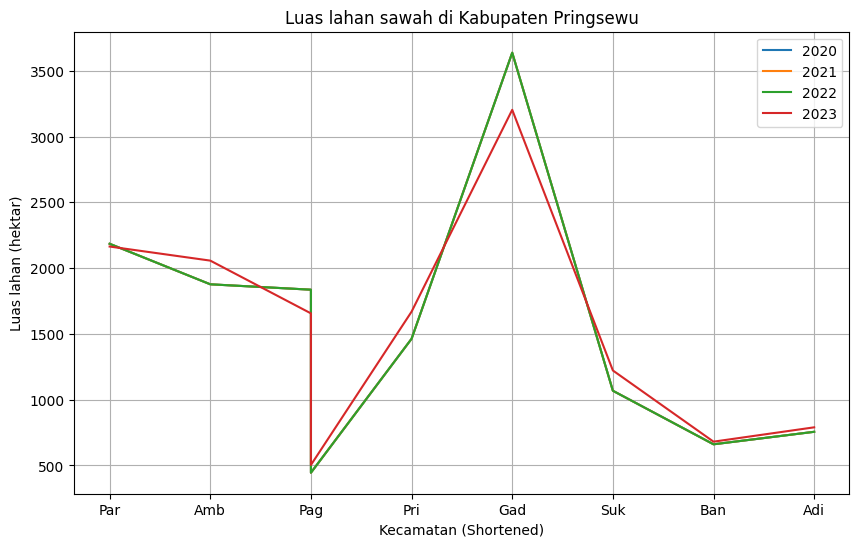

In [ ]:
#buat plot
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming 'Kecamatan' is a column in your DataFrame
kecamatan_shortened = penduduk['Kecamatan'].str[:3]

# Exclude Kab Pringsewu
pringsewu_mask = ~lahan['Kecamatan'].str.startswith('Kab')

# Plot lines for each year
plt.figure(figsize=(10, 6))
plt.plot(kecamatan_shortened[pringsewu_mask], lahan['2020'][pringsewu_mask], label='2020')
plt.plot(kecamatan_shortened[pringsewu_mask], lahan['2021'][pringsewu_mask], label='2021')
plt.plot(kecamatan_shortened[pringsewu_mask], lahan['2022'][pringsewu_mask], label='2022')
plt.plot(kecamatan_shortened[pringsewu_mask], lahan['2023'][pringsewu_mask], label='2023')

plt.xlabel('Kecamatan (Shortened)')
plt.ylabel('Luas lahan (hektar)')
plt.title('Luas lahan sawah di Kabupaten Pringsewu')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pringsewu = pd.merge(penduduk, lahan, on='Kecamatan')

**X = POPULASI PENDUDUK**

**Y = LUAH LAHAN SAWAH**

In [ ]:
print(pringsewu)

             Kecamatan  2020_x  2021_x  2022_x  2023_x  2020_y  2021_y  \
0            Pardasuka   35174   35292   37410   38027    2185    2185   
1             Ambarawa   36387   36509   39053   39612    1877    1877   
2            Pagelaran   52042   52216   55207   55930    1836    1836   
3      Pagelaran Utara   15301   15352   16311   16530     445     445   
4            Pringsewu   81776   82050   85897   87331    1463    1463   
5           Gadingrejo   77727   77987   82639   83907    3637    3637   
6            Sukoharjo   49704   49870   52845   53287    1068    1068   
7             Banyumas   21292   21363   22852   23300     661     661   
8             Adiluwih   36063   36184   38098   38758     756     756   
9  Kabupaten Pringsewu  405466  406823  437222  437222   13928   13928   

   2022_y  2023_y  
0    2185    2164  
1    1877    2057  
2    1836    1656  
3     445     504  
4    1463    1669  
5    3637    3203  
6    1068    1222  
7     661     681  
8    

In [ ]:
pringsewu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Kecamatan  10 non-null     object
 1   2020_x     10 non-null     int64 
 2   2021_x     10 non-null     int64 
 3   2022_x     10 non-null     int64 
 4   2023_x     10 non-null     int64 
 5   2020_y     10 non-null     int64 
 6   2021_y     10 non-null     int64 
 7   2022_y     10 non-null     int64 
 8   2023_y     10 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 848.0+ bytes


In [ ]:
from google.colab import data_table
data_table.DataTable(pringsewu)

,Kecamatan,2020_x,2021_x,2022_x,2023_x,2020_y,2021_y,2022_y,2023_y
0,Pardasuka,35174,35292,37410,38027,2185,2185,2185,2164
1,Ambarawa,36387,36509,39053,39612,1877,1877,1877,2057
2,Pagelaran,52042,52216,55207,55930,1836,1836,1836,1656
3,Pagelaran Utara,15301,15352,16311,16530,445,445,445,504
4,Pringsewu,81776,82050,85897,87331,1463,1463,1463,1669
5,Gadingrejo,77727,77987,82639,83907,3637,3637,3637,3203
6,Sukoharjo,49704,49870,52845,53287,1068,1068,1068,1222
7,Banyumas,21292,21363,22852,23300,661,661,661,681
8,Adiluwih,36063,36184,38098,38758,756,756,756,790
9,Kabupaten Pringsewu,405466,406823,437222,437222,13928,13928,13928,13928


In [ ]:
# Memilih kolom yang relevan
x = penduduk.loc[:, ['2020', '2021', '2022', '2023']]
y = lahan.loc[:, ['2020', '2021', '2022', '2023']]

In [ ]:
# Membagi data menjadi data latih dan data uji
import pandas as pd
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Membuat model regresi linier
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
coefficients = model.coef_
print("Koefisien Regresi:", coefficients)


Koefisien Regresi: [[-5.01123409e+02  4.97265328e+02 -5.86390931e-01  2.65353683e+00]
 [-5.01123409e+02  4.97265328e+02 -5.86390931e-01  2.65353683e+00]
 [-5.01123409e+02  4.97265328e+02 -5.86390931e-01  2.65353683e+00]
 [-9.04381885e+02  8.99611536e+02 -1.54220790e-01  1.81778226e+00]]


In [ ]:
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: [-321.68426714 -321.68426714 -321.68426714   45.25431226]


PREDIKSI RESPON


In [ ]:
# Melakukan prediksi pada data uji
y_pred = model.predict(x_test)
# Menampilkan hasil prediksi
print(y_pred)


[[1459.68163733 1459.68163733 1459.68163733 1473.64658597]
 [1218.91757101 1218.91757101 1218.91757101 1443.25051967]]


argumennya juga merupakan prediktor xdan respons y, dan nilai yang dikembalikan adalah 𝑅².

Atribut dari modeladalah .intercept_, yang menyatakan koefisien 𝑏₀, dan .coef_, yang menyatakan 𝑏₁:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Menghitung MSE dan R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 190964.19649354604
R-squared: 0.2356218103140617


Kode di atas mengilustrasikan cara mendapatkan 𝑏₀ dan 𝑏₁. Anda dapat melihat bahwa .intercept_adalah skalar, sedangkan .coef_adalah array. Dalam contoh ini, .intercept_dan .coef_adalah nilai estimasi.

In [ ]:
print("Shape of y_train:", y_train.shape)
print("\nHead of x_train:")
print(x_train.head())
print("\nHead of y_train:")
print(y_train.head())

Shape of y_train: (8, 4)

Head of x_train:
     2020    2021    2022    2023
4   81776   82050   85897   87331
9  405466  406823  437222  437222
1   36387   36509   39053   39612
6   49704   49870   52845   53287
7   21292   21363   22852   23300

Head of y_train:
    2020   2021   2022   2023
4   1463   1463   1463   1669
9  13928  13928  13928  13928
1   1877   1877   1877   2057
6   1068   1068   1068   1222
7    661    661    661    681


In [ ]:
# Asumsi data Anda disimpan dalam DataFrame 'df'
correlation_matrix = pringsewu.drop('Kecamatan', axis=1).corr()
print(correlation_matrix)

          2020_x    2021_x    2022_x    2023_x    2020_y    2021_y    2022_y  \
2020_x  1.000000  1.000000  0.999986  0.999996  0.983594  0.983594  0.983594   
2021_x  1.000000  1.000000  0.999986  0.999996  0.983594  0.983594  0.983594   
2022_x  0.999986  0.999986  1.000000  0.999995  0.984063  0.984063  0.984063   
2023_x  0.999996  0.999996  0.999995  1.000000  0.983984  0.983984  0.983984   
2020_y  0.983594  0.983594  0.984063  0.983984  1.000000  1.000000  1.000000   
2021_y  0.983594  0.983594  0.984063  0.983984  1.000000  1.000000  1.000000   
2022_y  0.983594  0.983594  0.984063  0.983984  1.000000  1.000000  1.000000   
2023_y  0.987429  0.987429  0.987911  0.987786  0.998901  0.998901  0.998901   

          2023_y  
2020_x  0.987429  
2021_x  0.987429  
2022_x  0.987911  
2023_x  0.987786  
2020_y  0.998901  
2021_y  0.998901  
2022_y  0.998901  
2023_y  1.000000  


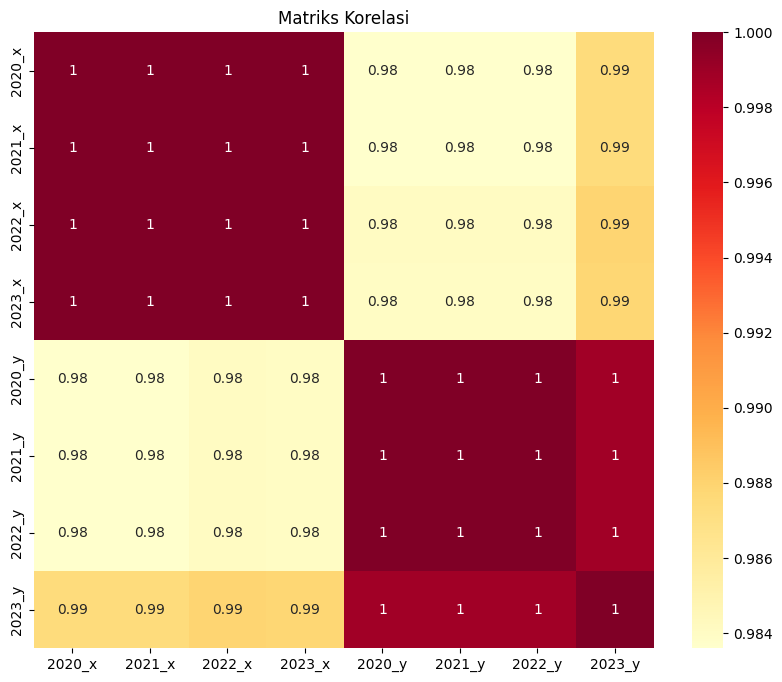

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Matriks Korelasi')
plt.show()

# **HASIL PREDISI MODEL REGRESI**
MENGEVALUASI SEBERAPA BAIK MODEL DAPAT MEMPREDIKSI NILAI PADA DATA ASLI/MENTAH

## Linearitas

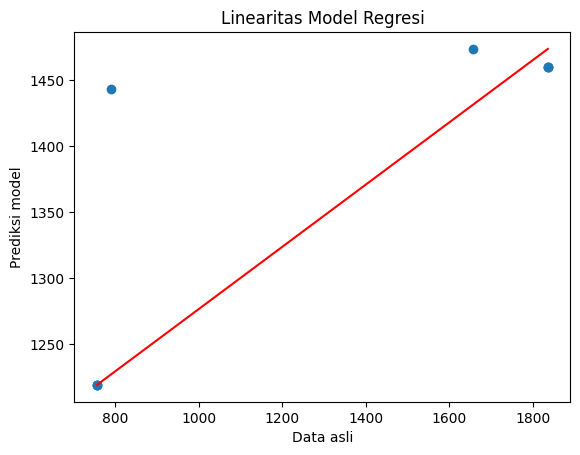

In [ ]:

import matplotlib.pyplot as plt

# Plot hasil prediksi vs nilai sebenarnya
plt.scatter(y_test, y_pred)
plt.xlabel("Data asli")
plt.ylabel("Prediksi model")
plt.title("Linearitas Model Regresi")

# Plot garis regresi
plt.plot([min(y_test.values.flatten()), max(y_test.values.flatten())],
         [min(y_pred.flatten()), max(y_pred.flatten())], color='red')

plt.show()


Dari hasil pemodelan dapat dilihat bahwa **titik-titik data cukup dekat dengan garis regresi, menunjukkan bahwa model regresi linier mampu menjelaskan dengan baik hubungan antara variabel independen dan variabel dependen**

## Kenapa parameter yang digunakan y_pred dan y_tes ?

digunakan parameter berupa nilai y_pred (sebagai nilai prediksi model) dan y_test (data asli) untuk memahami dan emmodelkan hubungan antara variabel yang terlibat dan seberapa baik model regresi dapat mencocokan data asli (seberapa linear hubungan model prediksi dengan data asli), serta mengidentifikasi bias atau penyimpangan sistematis anatara nilai pred dan test (asli)

In [ ]:
# Residual
residuals = y_test - y_pred

In [ ]:
print(residuals)

         2020        2021        2022        2023
2  376.318363  376.318363  376.318363  182.353414
8 -462.917571 -462.917571 -462.917571 -653.250520


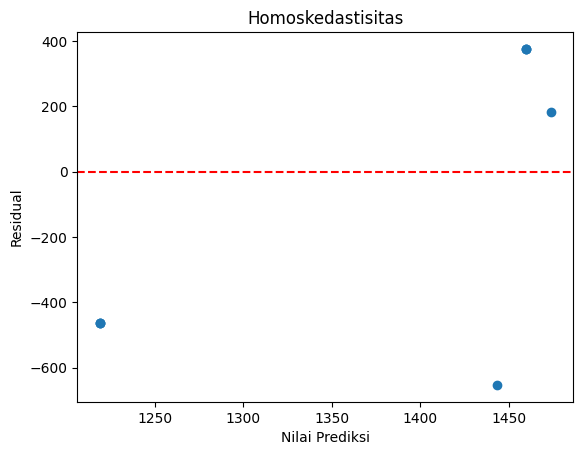

In [ ]:
# 2. Homoskedastisitas
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Homoskedastisitas')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual')
plt.show()

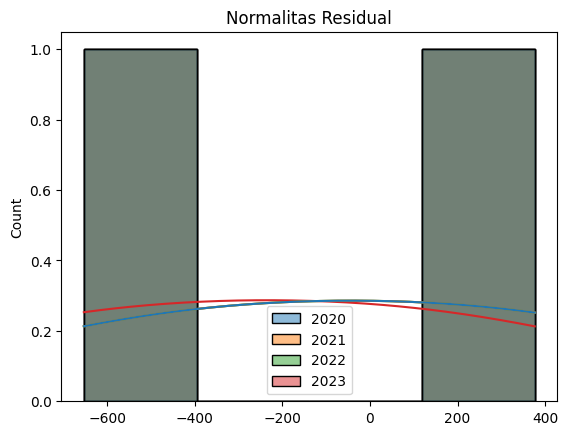

In [ ]:
# 3. Normalitas Residual
sns.histplot(residuals, kde=True)
plt.title('Normalitas Residual')
plt.show()

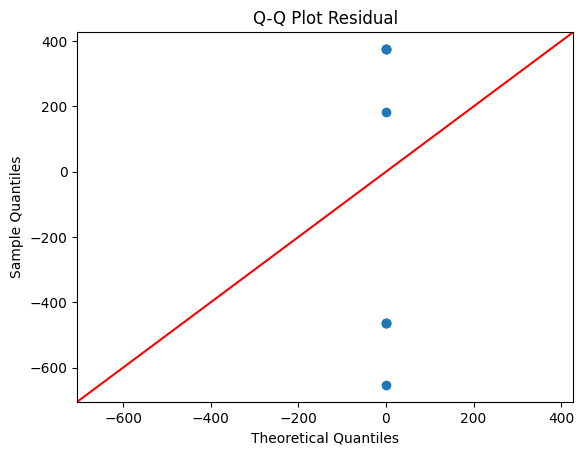

In [ ]:
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot Residual')
plt.show()

In [ ]:
# Uji Durbin-Watson
dw = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: [1.97892877 1.97892877 1.97892877 1.51793613]


Berdasarkan hasil Durbin-Watson statistic yang Anda berikan, [1.97892877, 1.97892877, 1.97892877, 1.51793613], dapat disimpulkan bahwa model regresi Anda secara keseluruhan tidak memiliki masalah autokorelasi yang signifikan, dengan beberapa catatan:

Tiga nilai Durbin-Watson (1.97892877, 1.97892877, 1.97892877) berada di sekitar 2, menunjukkan tidak adanya autokorelasi.

In [ ]:

from scipy.stats import pearsonr

# Menghitung korelasi dan p-value
corr, p_value = pearsonr(x.values.flatten(), y.values.flatten())

print("Korelasi:", corr)
print("P-value:", p_value)


Korelasi: 0.9837366845888776
P-value: 6.0411602222614456e-30


Korelasi: 0.9837366845888776
Nilai korelasi ini mengindikasikan ada hubungan yang sangat kuat antara dua variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana:

Nilai 0.9837366845888776 mendekati 1, menunjukkan hubungan positif yang sangat kuat antara dua variabel.
Nilai yang mendekati 1 berarti ketika satu variabel meningkat, variabel lain juga cenderung meningkat secara linier.

P-value adalah probabilitas untuk mendapatkan hasil sampel (dalam hal ini, nilai korelasi 0.9837366845888776) jika hipotesis nol (tidak ada hubungan antara dua variabel) benar.

Nilai p-value yang sangat kecil, yaitu 6.0411602222614456e-30 (atau 0.0000000000000000000000000000060411602222614456), menunjukkan bahwa kemungkinan hasil sampel (korelasi 0.9837366845888776) terjadi secara kebetulan jika hipotesis nol benar adalah sangat kecil.

Dengan kata lain, p-value yang sangat kecil ini memberikan bukti yang kuat untuk menolak hipotesis nol dan menyimpulkan bahwa ada hubungan yang signifikan secara statistik antara dua variabel yang dianalisis.